# SVR Practice

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
sns.set_style('darkgrid')
from sklearn import svm
from skopt import gp_minimize
import warnings
warnings.filterwarnings('ignore')

## データセット

In [24]:
N = 1000
M = 10
X_train, y_train = [], []
X_test,  y_test  = [], []
for i in range(N):
    x = np.random.rand() * 100 - 100
    z = np.random.rand() * 100 - 100
    y = 3*x - 2*z + np.random.normal(loc=0,scale=1)
    X_train.append([x,z])
    y_train.append(y)

for i in range(M):
    x = np.random.rand() * 100 - 100
    z = np.random.rand() * 100 - 100
    y = 3*x - 2*z + np.random.normal(loc=0,scale=1)
    X_test.append([x,z])
    y_test.append(y)

## グリッドサーチによるハイパーパラメータ推定&可視化

In [25]:
scores = pd.DataFrame()
for g in np.logspace(-15, 3, 19, base=2):
    for c in np.logspace(-5, 15, 21, base=2):
        clf = svm.SVR(gamma=g, C=c)
        clf.fit(X_train, y_train)
        scores = scores.append({'gamma': g,'C': c,'accuracy': clf.score(X_test, y_test)},ignore_index=True)

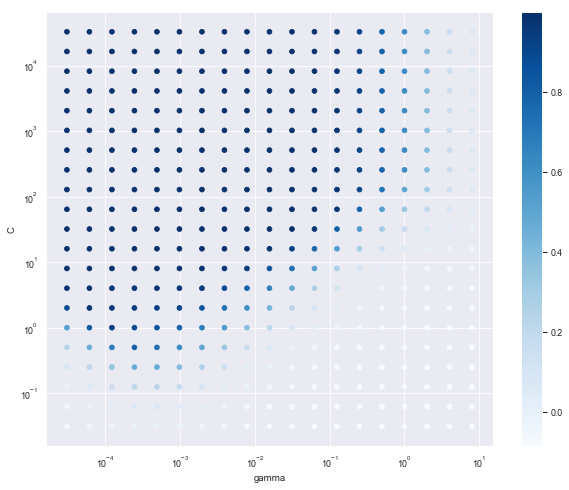

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('gamma')
ax.set_ylabel('C')
ax = ax.scatter(scores.gamma, scores.C, c=scores.accuracy, cmap='Blues')
fig.colorbar(ax)
plt.show()

## ベイズ最適化によるハイパーパラメータ推定&可視化

In [27]:
spaces = [(2**-15, 2**3, 'log-uniform'), # gamma
          (2**-5, 2**15, 'log-uniform')] # C
scores = pd.DataFrame()
def f(x):
    global scores
    clf = svm.SVR(gamma=x[0], C=x[1])
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores = scores.append({'gamma': x[0],'C': x[1], 'accuracy': score},ignore_index=True)
    return -1 * score
res = gp_minimize(f, spaces, acq_func="EI", n_calls=30)

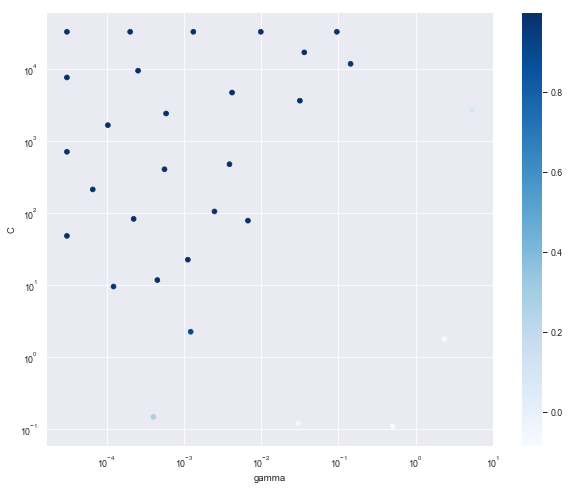

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('gamma')
ax.set_ylabel('C')
ax = ax.scatter(scores.gamma, scores.C, c=scores.accuracy, cmap='Blues')
fig.colorbar(ax)
plt.show()